# 01. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data ords_prods_new.pkl from 4.8 
path = r'/Users/bdigregorio/Desktop/CareerFoundry/' \
r'Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [3]:
path

'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [4]:
ords_prods_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_new.pkl'))


In [5]:
ords_prods_new.shape

(32642461, 26)

In [6]:
ords_prods_new.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,Most orders,max_order,loyalty_flag,avg_spent,spender_type,median_order_days,customer_type
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,0.0,both,...,Mid-range product,Regularly busy,Regularly busy,Fewest orders,11.0,Regular customer,6.367797,Low spender,20.0,Regular customer
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,both,...,Mid-range product,Regularly busy,Regularly busy,Fewest orders,11.0,Regular customer,6.367797,Low spender,20.0,Regular customer
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,both,...,Mid-range product,Regularly busy,Regularly busy,Most orders,11.0,Regular customer,6.367797,Low spender,20.0,Regular customer
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,both,...,Mid-range product,Least busy,Regularly busy,Fewest orders,11.0,Regular customer,6.367797,Low spender,20.0,Regular customer
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,both,...,Mid-range product,Least busy,Regularly busy,Most orders,11.0,Regular customer,6.367797,Low spender,20.0,Regular customer


In [7]:
ords_prods_new['prices'].describe()

count    3.243422e+07
mean     1.198114e+01
std      4.954310e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [8]:
ords_prods_new['prices'].info()

<class 'pandas.core.series.Series'>
Int64Index: 32642461 entries, 0 to 32642460
Series name: prices
Non-Null Count     Dtype  
--------------     -----  
32434223 non-null  float64
dtypes: float64(1)
memory usage: 498.1 MB


# 2. Bar charts

<Axes: >

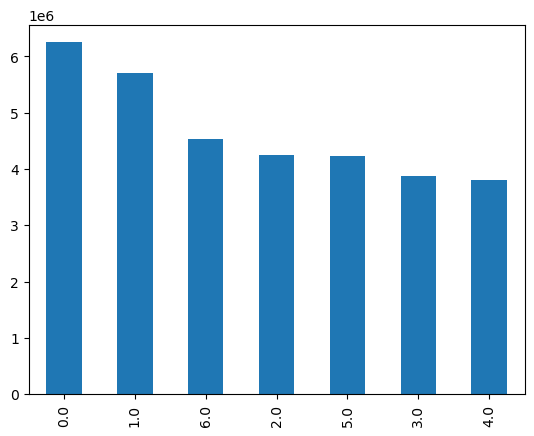

In [9]:
# creating bar chart
ords_prods_new['orders_day_of_the_week'].value_counts().plot.bar()


<Axes: >

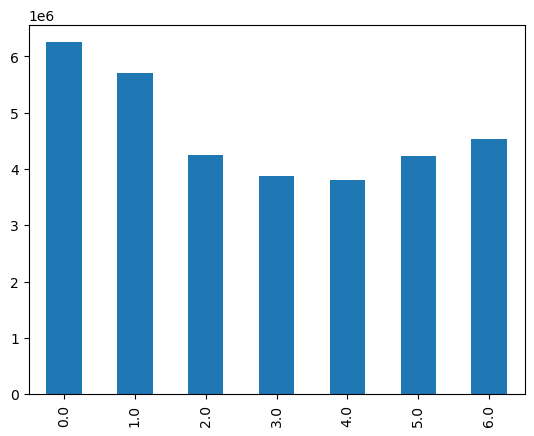

In [10]:
# sorting by index order
ords_prods_new['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

In [11]:
# printing frequencies
ords_prods_new['orders_day_of_the_week'].value_counts()

0.0    6253163
1.0    5696950
6.0    4530449
2.0    4243329
5.0    4237104
3.0    3868914
4.0    3812541
Name: orders_day_of_the_week, dtype: int64

In [12]:
# printing frequency by index order
ords_prods_new['orders_day_of_the_week'].value_counts().sort_index()

0.0    6253163
1.0    5696950
2.0    4243329
3.0    3868914
4.0    3812541
5.0    4237104
6.0    4530449
Name: orders_day_of_the_week, dtype: int64

Text(0.5, 1.0, 'Orders per Day of the Week')

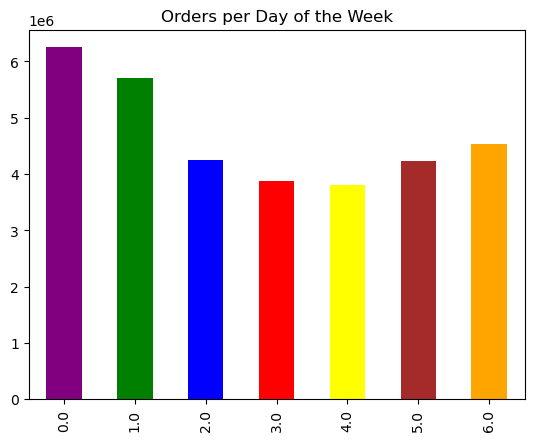

In [13]:
# adding color
ords_prods_new['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color = ['purple','green','blue','red','yellow','brown','orange'])
plt.title("Orders per Day of the Week")

Text(0.5, 1.0, 'Orders per Day of the Week')

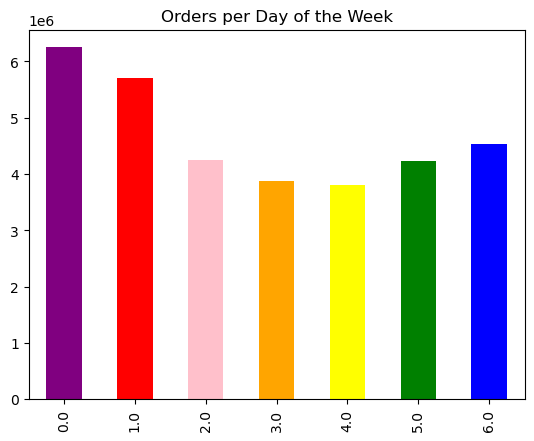

In [14]:
# saving bar chart to Jupyter memory
bar = ords_prods_new['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title("Orders per Day of the Week")

In [15]:
# exportiing bar chart to Instacart analysis visuals
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','from reading exercise', 'bar_orders_dow_reading_exercise.png'))


# 3. Histograms and Scatterplots

<Axes: ylabel='Frequency'>

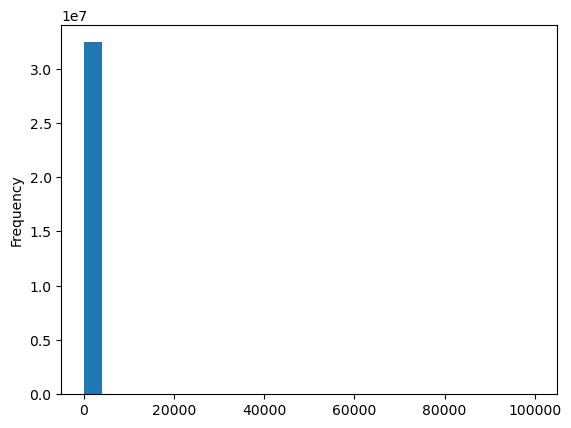

In [16]:
# creating histogram
ords_prods_new['prices'].plot.hist(bins = 25)

In [17]:
# statistics checks
ords_prods_new['prices'].describe()

count    3.243422e+07
mean     1.198114e+01
std      4.954310e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
ords_prods_new['prices'].mean()

11.98114268376334

In [19]:
ords_prods_new['prices'].median()

7.4

In [20]:
ords_prods_new['prices'].max()

99999.0

In [21]:
ords_prods_new['prices']

0            9.0
1            9.0
2            9.0
3            9.0
4            9.0
            ... 
32642456    14.3
32642457     8.1
32642458     9.8
32642459     1.7
32642460     9.1
Name: prices, Length: 32642461, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

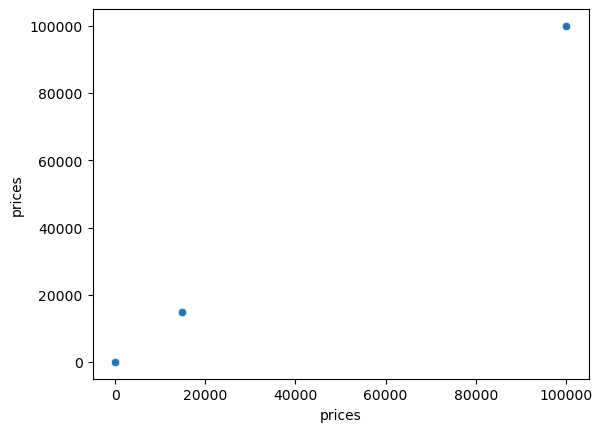

In [22]:
sns.scatterplot( x = 'prices', y = 'prices', data = ords_prods_new)

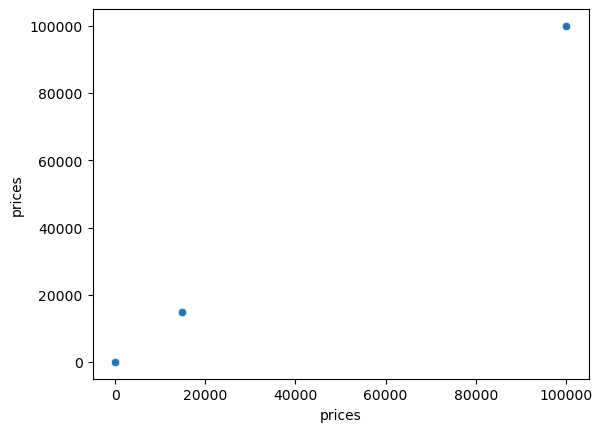

In [23]:
# creating 'scatter_outliers' for Jupyter 
scatter_outliers_reading = sns.scatterplot( x = 'prices', y = 'prices', data = ords_prods_new)

In [24]:
# exporting scatter_outliers_reading
scatter_outliers_reading.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'from reading exercise','scatter_outliers_reading_exercise.png'))


In [25]:
ords_prods_new.loc[ords_prods_new['prices']> 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,Most orders,max_order,loyalty_flag,avg_spent,spender_type,median_order_days,customer_type
10236554,912404.0,17.0,12.0,2.0,14.0,5.0,21553.0,5.0,0.0,both,...,High-range product,Regularly busy,Regularly busy,Most orders,41.0,Loyal customer,108.648299,High spender,5.0,Frequent customer
10236555,603376.0,17.0,22.0,6.0,16.0,4.0,21553.0,3.0,1.0,both,...,High-range product,Regularly busy,Least busy days,Fewest orders,41.0,Loyal customer,108.648299,High spender,5.0,Frequent customer
10236556,3264360.0,135.0,2.0,2.0,21.0,13.0,21553.0,6.0,0.0,both,...,High-range product,Regularly busy,Regularly busy,Fewest orders,5.0,New customer,1154.792308,High spender,12.0,Regular customer
10236557,892534.0,135.0,3.0,0.0,8.0,12.0,21553.0,3.0,1.0,both,...,High-range product,Busiest day,Busiest days,Fewest orders,5.0,New customer,1154.792308,High spender,12.0,Regular customer
10236558,229704.0,342.0,8.0,1.0,19.0,30.0,21553.0,9.0,0.0,both,...,High-range product,Regularly busy,Regularly busy,Fewest orders,17.0,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29401455,2249946.0,204099.0,29.0,0.0,8.0,4.0,33664.0,1.0,0.0,both,...,High-range product,Busiest day,Busiest days,Fewest orders,40.0,Regular customer,1106.743956,High spender,4.0,Frequent customer
29401456,2363282.0,204099.0,31.0,0.0,9.0,2.0,33664.0,1.0,1.0,both,...,High-range product,Busiest day,Busiest days,Fewest orders,40.0,Regular customer,1106.743956,High spender,4.0,Frequent customer
29401457,3181945.0,204395.0,13.0,3.0,15.0,8.0,33664.0,25.0,0.0,both,...,High-range product,Regularly busy,Regularly busy,Most orders,16.0,Regular customer,451.153540,High spender,5.0,Frequent customer
29401458,2486215.0,205227.0,7.0,3.0,20.0,4.0,33664.0,8.0,0.0,both,...,High-range product,Regularly busy,Regularly busy,Fewest orders,13.0,Regular customer,1178.381871,High spender,12.0,Regular customer


In [26]:
ords_prods_new.loc[ords_prods_new['prices'] >100, 'prices'] = np.nan

In [27]:
ords_prods_new['prices'].max()

25.0

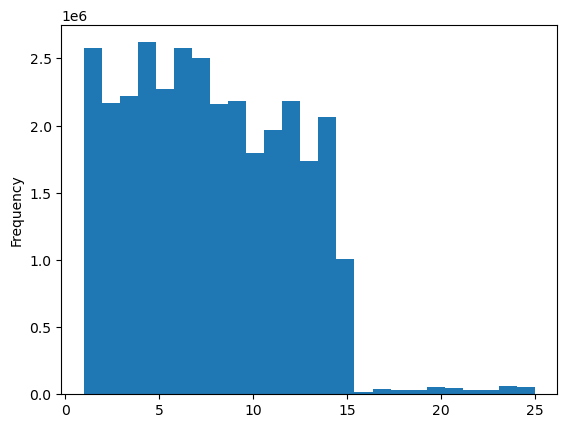

In [28]:
hist = ords_prods_new['prices'].plot.hist(bins = 25)

Text(0.5, 1.0, 'Frequency of Prices in Orders')

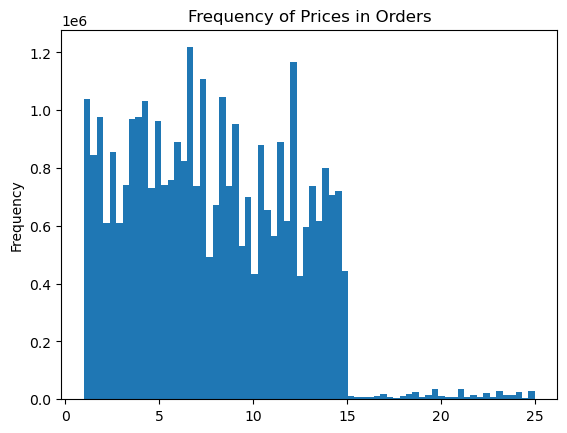

In [29]:
hist_prices_reading = ords_prods_new['prices'].plot.hist(bins = 70)
plt.title("Frequency of Prices in Orders")

In [30]:
# exporting histogram to Instacart Analysis Visuals
hist_prices_reading.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','from reading exercise', 'hist_prices_frequency_reading_exercise.png'))


<Axes: xlabel='prices', ylabel='prices'>

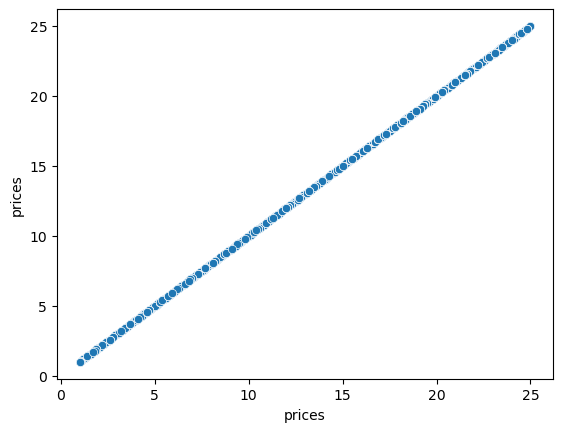

In [31]:
# new scatterplot to Jupyter
sns.scatterplot( x = 'prices', y = 'prices', data = ords_prods_new)


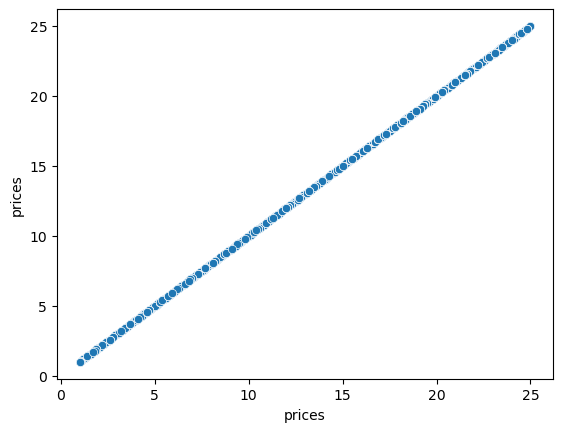

In [32]:
# saving new scatter to Jupyter
scatter_reading = sns.scatterplot( x = 'prices', y = 'prices', data = ords_prods_new)


In [33]:
# exporting scatterplot to Instacart Analysis visuals
scatter_reading.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','from reading exercise', 'scatter_prices_reading_exercise.png'))


In [34]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_new)) <= 0.7

In [35]:
dev

array([False,  True, False, ..., False,  True,  True])

In [36]:
np.random.rand(10)

array([0.28928073, 0.15593137, 0.73636922, 0.43473489, 0.24921401,
       0.04250419, 0.44543182, 0.31580325, 0.37058641, 0.72772152])

In [37]:
# create a list of True/False values to the test np.random.rand()<= 0.7

dev = np.random.rand(len(ords_prods_new)) <= 0.7

In [38]:
# Store 70% of sample in df 'big'

big = ords_prods_new[dev]

In [39]:
# Store 30% of sample in df 'small'

small = ords_prods_new[~dev]

In [40]:
# checking sampling results
len(ords_prods_new)

32642461

In [41]:
len(big) + len(small)

32642461

In [42]:
# creating the 30% sample
df_2 = small[['orders_day_of_the_week', 'prices' ]]

Text(0.5, 1.0, 'Total Order Value per Day of the Week')

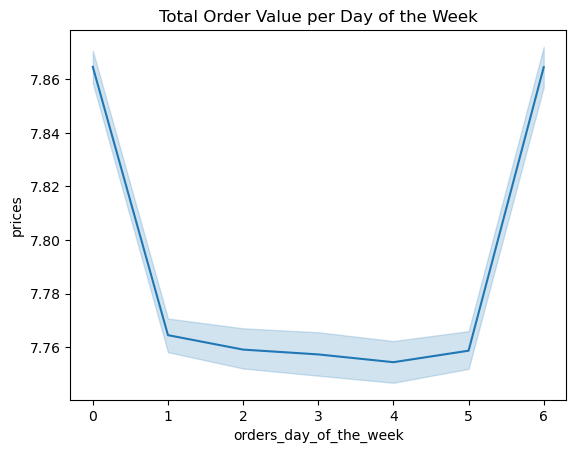

In [43]:
# creating line chart

line_reading = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')
plt.title("Total Order Value per Day of the Week")

In [56]:
# creating the 70% sample
df_3 = big[['orders_day_of_the_week', 'prices' ]]

KeyboardInterrupt: 

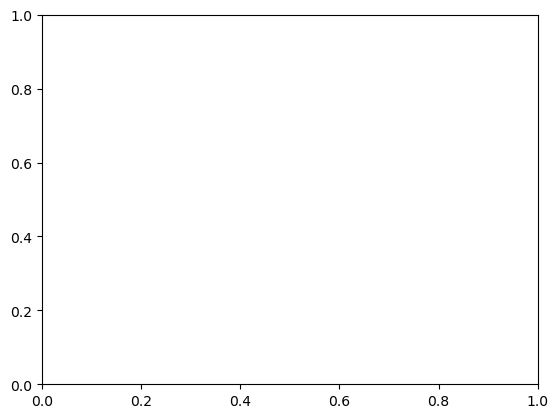

In [57]:
# creating line chart for 'big' sample

line_2 = sns.lineplot(data = df_3, x = 'orders_day_of_the_week', y = 'prices')

In [44]:
# export line sample
line_reading.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','from reading exercise', 'line_order_value_reading_exercise.png'))


In [ ]:
# exporting ords_pros_new
ords_prods_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_new.pkl'))

